In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np



# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [81]:
df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [57]:
df_1 = df.drop(columns=["id", "host_id", "host_name"])

In [58]:
df_1 = df_1.drop(columns=["name", "latitude", "longitude"])

In [59]:
print(df_1.columns)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [60]:
df_1.select_dtypes(include=['object', 'category']).columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

In [61]:
df_1['neighbourhood'].value_counts()
df_1['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [62]:
#What do I do with the neighbourhood column- there are 221 neighbourhoods

df_2 = df_1.drop(columns=["neighbourhood"])

In [63]:
df_2.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [64]:
df_2.select_dtypes(include=['object', 'category']).columns

Index(['neighbourhood_group', 'room_type', 'last_review'], dtype='object')

In [65]:
df_2['last_review']= pd.to_datetime(df_2['last_review'])
print(df_2['last_review'].dtype)
print(df_2['last_review'].head(n=10))

datetime64[ns]
0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
5   2019-06-22
6   2017-10-05
7   2019-06-24
8   2017-07-21
9   2019-06-09
Name: last_review, dtype: datetime64[ns]


In [66]:
#df_2["neighbourhood_group"] = pd.factorize(df_2["neighbourhood_group"])[0]
codes, uniques = pd.factorize(df_2["neighbourhood_group"])
df_2["room_type"] = pd.factorize(df_2["room_type"])[0]

In [69]:

df_2["neighbourhood_group"].unique()

[0 1 1 ... 1 1 1]


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [68]:
df_2.describe()

,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,0.567113,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,0.000000,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,0.000000,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.000000,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,1.000000,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,2.000000,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,0.541249,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


[Text(0, 0.5, 'neighbourhood_group'),
 Text(0, 1.5, 'room_type'),
 Text(0, 2.5, 'price'),
 Text(0, 3.5, 'minimum_nights'),
 Text(0, 4.5, 'number_of_reviews'),
 Text(0, 5.5, 'calculated_host_listings_count'),
 Text(0, 6.5, 'availability_365')]

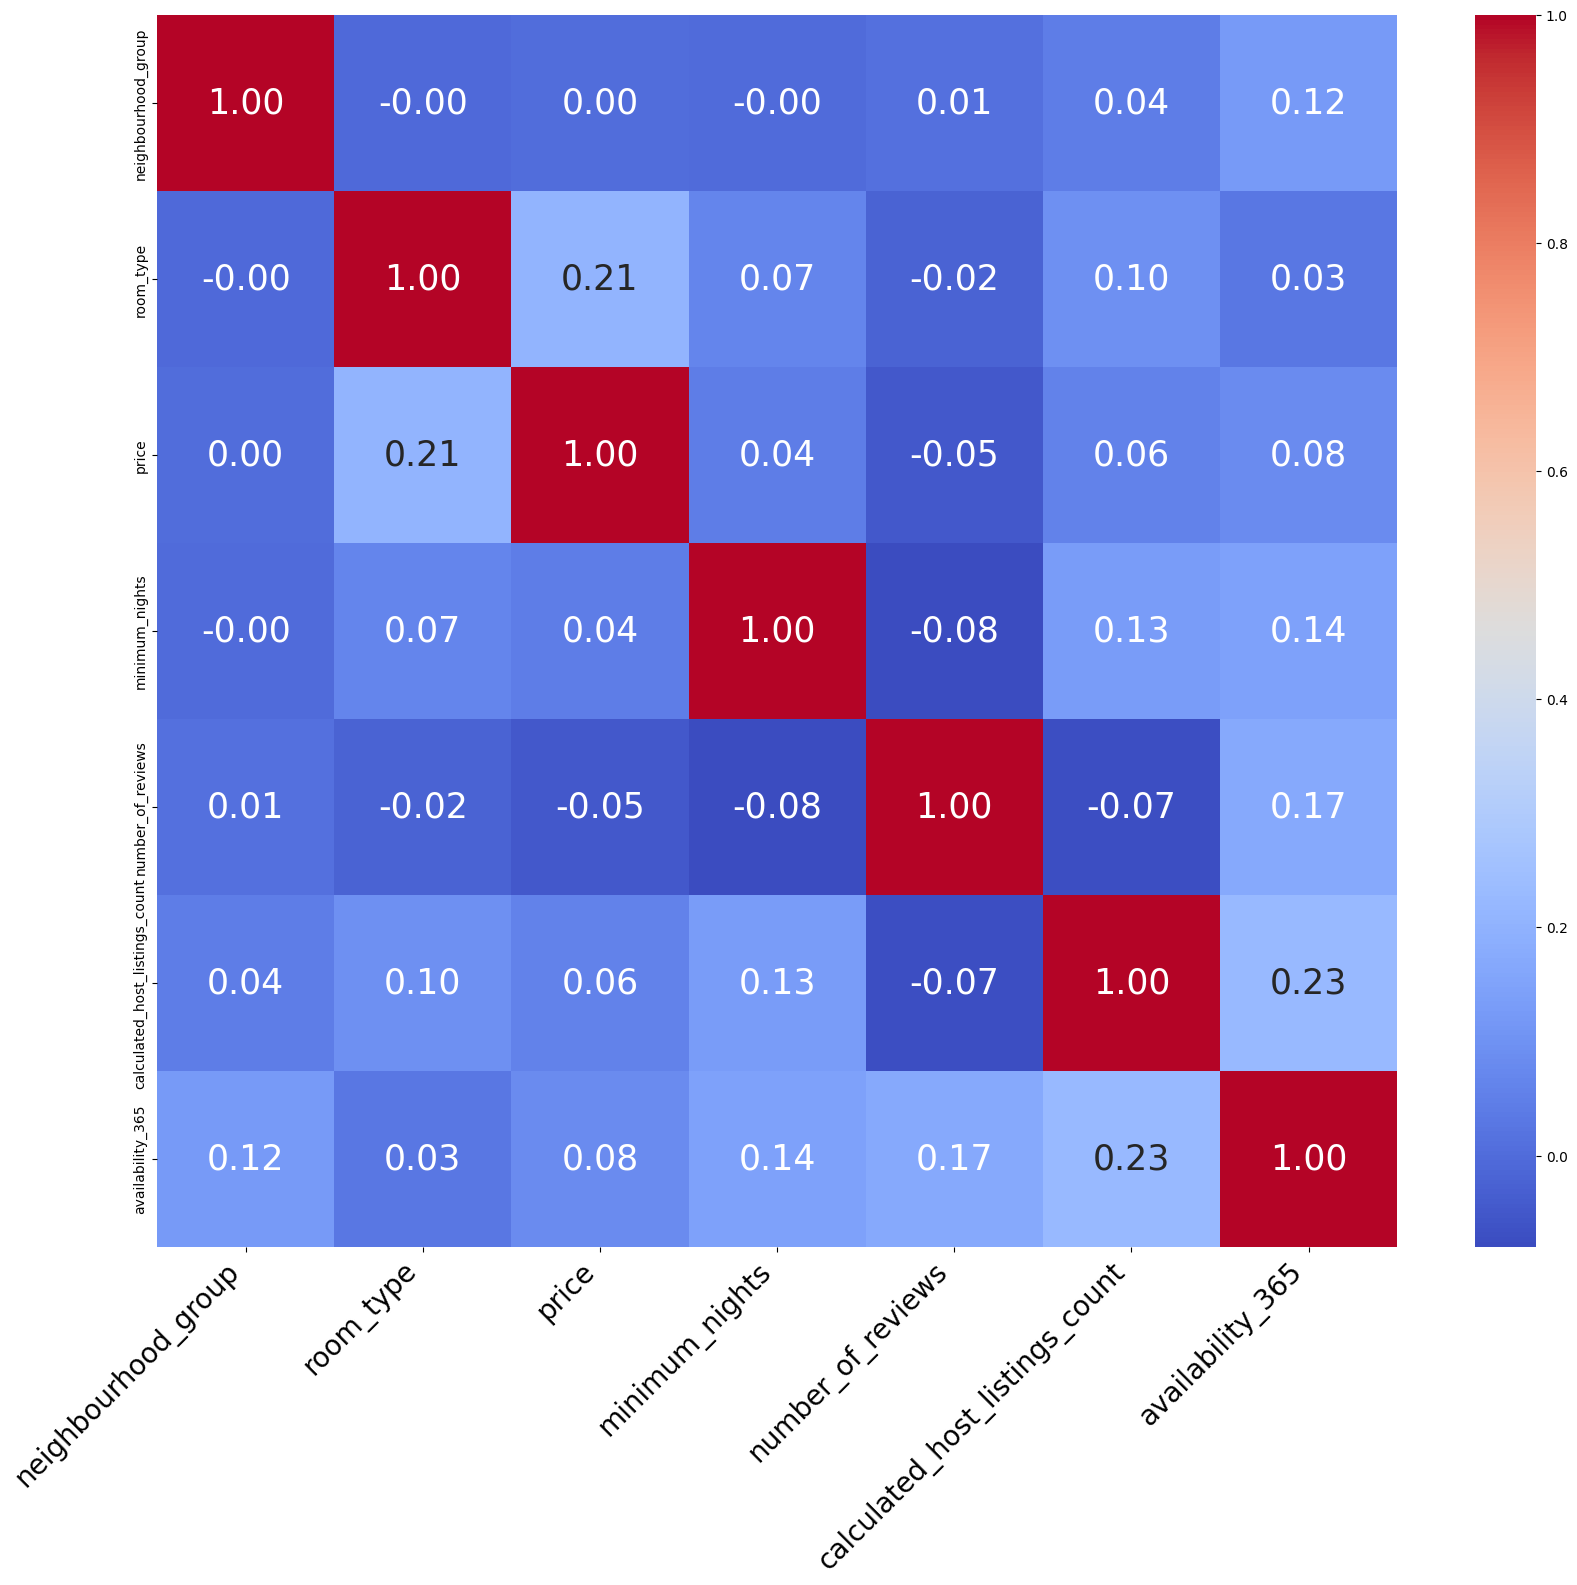

In [30]:
fig, axis = plt.subplots(figsize=(20, 16))

sns.heatmap(df_2[["neighbourhood_group", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 25})

axis.set_xticklabels(axis.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=20)
axis.set_yticklabels(axis.get_yticklabels(), fontsize=10)

In [70]:
#I want to make a graph of the correlation between the variables price and room_type as well as calculated_host_listings_count and availability_365

<Axes: xlabel='price', ylabel='room_type'>

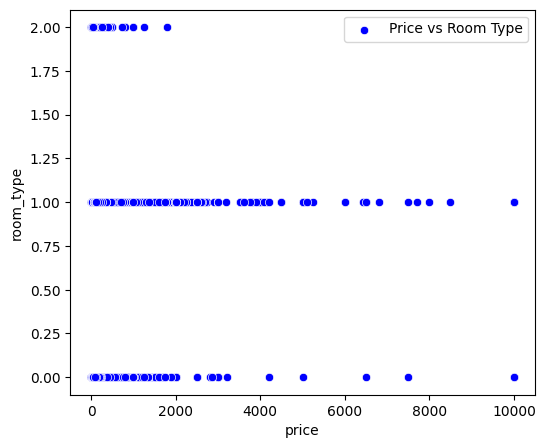

In [78]:
fig, axis = plt.subplots(figsize=(6, 5))
sns.scatterplot(x="price", y="room_type", data=df_2, color="blue", label="Price vs Room Type")

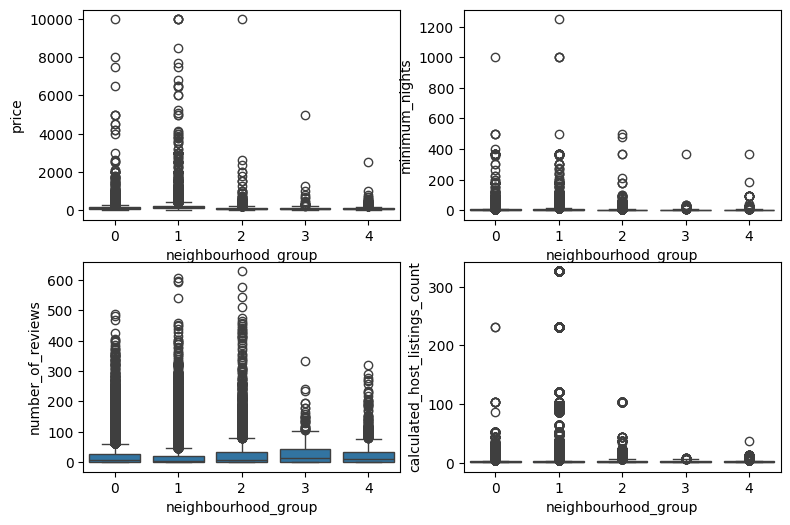

In [ ]:
#I want to make a boxplot of the neighbourhood_group and the other variables
fig, axis = plt.subplots(2, 2, figsize=(9, 6))
for i, variable in enumerate(["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]):
    sns.boxplot(x="neighbourhood_group", y=variable, data=df_2, ax=axis[i // 2, i % 2])


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

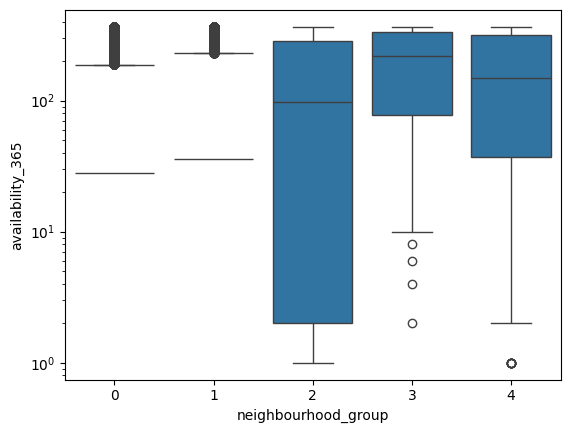

In [42]:
sns.boxplot(x="neighbourhood_group", y="availability_365", data=df_2, log_scale=True)